<a href="https://colab.research.google.com/github/zinseo964/dam_flow/blob/main/day_day(weight).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rain_data211 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rain/rn_20240130172151.csv',encoding='cp949')
rain_data101 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rain/rn_20240130172202.csv',encoding='cp949')
rain_data100 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rain/rn_20240130172215.csv',encoding='cp949')
rain_data212 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rain/rn_20240130172236.csv',encoding='cp949')
rain_data90 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rain/rn_20240130172245.csv',encoding='cp949')

In [ ]:
# rain_data = pd.merge(rain_data211, rain_data101, how='outer')
from functools import reduce

rain_data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data211, rain_data101, rain_data100, rain_data212, rain_data90])

In [ ]:
print(rain_data)

              날짜  211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)
0     2009-01-01         NaN         NaN         NaN         NaN        NaN
1     2009-01-02         NaN         NaN         NaN         NaN        NaN
2     2009-01-03         NaN         NaN         NaN         NaN        NaN
3     2009-01-04         NaN         NaN         NaN         NaN        NaN
4     2009-01-05         NaN         NaN         NaN         NaN        NaN
...          ...         ...         ...         ...         ...        ...
5473  2023-12-27         NaN         NaN         NaN         NaN        NaN
5474  2023-12-28         NaN         NaN         NaN         NaN        NaN
5475  2023-12-29         NaN         NaN         NaN         NaN        NaN
5476  2023-12-30         6.8         9.9         2.3         8.5        0.7
5477  2023-12-31         3.1         5.3         6.0         4.9       26.8

[5478 rows x 6 columns]


In [ ]:
rain_col = [i for i in rain_data.columns if '강수' in i]
rain_data[rain_col] = rain_data[rain_col].fillna(0)

In [ ]:
print(rain_data)

              날짜  211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)
0     2009-01-01         0.0         0.0         0.0         0.0        0.0
1     2009-01-02         0.0         0.0         0.0         0.0        0.0
2     2009-01-03         0.0         0.0         0.0         0.0        0.0
3     2009-01-04         0.0         0.0         0.0         0.0        0.0
4     2009-01-05         0.0         0.0         0.0         0.0        0.0
...          ...         ...         ...         ...         ...        ...
5473  2023-12-27         0.0         0.0         0.0         0.0        0.0
5474  2023-12-28         0.0         0.0         0.0         0.0        0.0
5475  2023-12-29         0.0         0.0         0.0         0.0        0.0
5476  2023-12-30         6.8         9.9         2.3         8.5        0.7
5477  2023-12-31         3.1         5.3         6.0         4.9       26.8

[5478 rows x 6 columns]


In [ ]:
dam_flow = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/dam/only_dam_flow.csv',encoding='utf-8')

print(dam_flow)

              날짜  유입량(㎥/s)
0     2009-01-01     0.000
1     2009-01-02     0.825
2     2009-01-03     3.904
3     2009-01-04     0.000
4     2009-01-05     0.000
...          ...       ...
5473  2023-12-27    25.873
5474  2023-12-28    21.186
5475  2023-12-29    20.887
5476  2023-12-30    29.183
5477  2023-12-31    25.803

[5478 rows x 2 columns]


In [ ]:
rain_col = [i for i in rain_data.columns if '강수' in i]
rain_data[rain_col] = rain_data[rain_col].fillna(0)
print(rain_col)

rain = []

for i in range(0,len(rain_data)):
  r_data = 0
  for col in rain_col:
    if '211' in col :
      r_data += rain_data[col][i]*0.668
    elif '101' in col:
      r_data += rain_data[col][i] * 0.124
    elif '100' in col:
      r_data += rain_data[col][i] * 0.114
    elif '90' in col:
      r_data += rain_data[col][i] * 0.094
  rain.append(r_data)

print(rain)

['211강수량(mm)', '101강수량(mm)', '100강수량(mm)', '212강수량(mm)', '90강수량(mm)']
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5664, 0.0, 0.5834000000000001, 0.0, 0.0, 0.0, 0.012400000000000001, 0.0, 0.0724, 0.2082, 0.0342, 0.0, 0.0, 0.0, 3.0309999999999997, 2.5796, 0.0, 0.0, 0.3874, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.049600000000000005, 1.7386000000000001, 18.901, 0.0, 0.2166, 0.0, 0.0, 0.0, 0.0352, 0.16760000000000003, 0.0, 0.0, 1.4314, 0.38360000000000005, 0.6972, 0.0, 0.0, 0.0, 0.235, 1.3922, 0.5388000000000001, 0.0, 3.0470000000000006, 0.2906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4188, 20.564400000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 4.901400000000001, 0.0228, 0.405, 12.95, 1.5133999999999999, 0.0, 0.0352, 10.462, 0.0, 0.188, 1.2364, 1.6254, 10.534600000000001, 0.16780000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2488, 9.107, 0.532, 0.0, 0.0, 0.0342, 33.625, 4.2459999999999996, 0.0, 0.0, 9.004000000000001, 9.967, 0.339, 0.681, 0.4254000000000

In [ ]:
rain_data['rain'] = rain
print(rain_data)

              날짜  211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)  \
0     2009-01-01         0.0         0.0         0.0         0.0        0.0   
1     2009-01-02         0.0         0.0         0.0         0.0        0.0   
2     2009-01-03         0.0         0.0         0.0         0.0        0.0   
3     2009-01-04         0.0         0.0         0.0         0.0        0.0   
4     2009-01-05         0.0         0.0         0.0         0.0        0.0   
...          ...         ...         ...         ...         ...        ...   
5473  2023-12-27         0.0         0.0         0.0         0.0        0.0   
5474  2023-12-28         0.0         0.0         0.0         0.0        0.0   
5475  2023-12-29         0.0         0.0         0.0         0.0        0.0   
5476  2023-12-30         6.8         9.9         2.3         8.5        0.7   
5477  2023-12-31         3.1         5.3         6.0         4.9       26.8   

        rain  
0     0.0000  
1     0.0000  
2     

In [ ]:
rain_col = [i for i in rain_data.columns if '강수' in i]
rain_data = rain_data.drop(rain_col, axis = 1)

In [ ]:
data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data, dam_flow])

<Axes: >

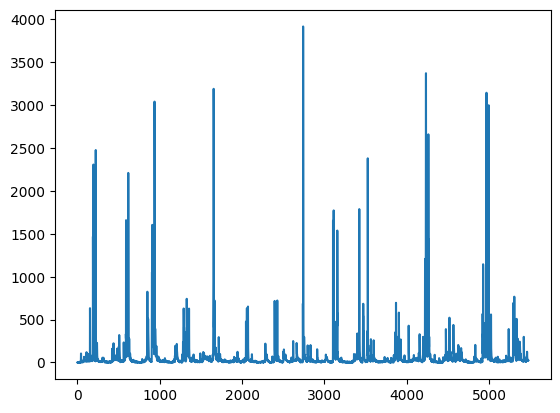

In [ ]:
# data.index = pd.to_datetime(data['날짜'])

dam_flow = data['유입량(㎥/s)']
dam_flow.plot()

In [ ]:
print(data)

              날짜    rain  유입량(㎥/s)
0     2009-01-01  0.0000     0.000
1     2009-01-02  0.0000     0.825
2     2009-01-03  0.0000     3.904
3     2009-01-04  0.0000     0.000
4     2009-01-05  0.0000     0.000
...          ...     ...       ...
5473  2023-12-27  0.0000    25.873
5474  2023-12-28  0.0000    21.186
5475  2023-12-29  0.0000    20.887
5476  2023-12-30  6.0980    29.183
5477  2023-12-31  5.9312    25.803

[5478 rows x 3 columns]


In [ ]:
origin_dam_flow = data['유입량(㎥/s)'].values
dates = pd.to_datetime(data['날짜'])

In [ ]:
cols = list(data)[1:2]

dam_data = data[cols].astype(float)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(dam_data)
dam_data_scaled = scaler.transform(dam_data)

In [ ]:
n_train = int(0.9* dam_data_scaled.shape[0])
train_data_scaled = dam_data_scaled[0:n_train]
train_dates = dates[0:n_train]

test_data_scaled = dam_data_scaled[n_train:]
test_dates = dates[n_train:]

In [ ]:
pred_days = 1
seq_len = 14
input_dim = 2 # input_dimension ['rain','유입량']

trainX = []
trainY = []
testX = []
testY  = []

for i in range(seq_len, n_train - pred_days + 1):
  trainX.append(train_data_scaled[i - seq_len : i, 0:train_data_scaled.shape[1]])
  trainY.append(train_data_scaled[i+pred_days - 1: i + pred_days, 0])

for i in range(seq_len , len(test_data_scaled) - pred_days + 1):
  testX.append(test_data_scaled[i-seq_len:i, 0:test_data_scaled.shape[1]])
  testY.append(test_data_scaled[i+pred_days -1 : i + pred_days, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

In [ ]:
trainX.shape

(4916, 14, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from keras.models import load_model


model = Sequential()
model.add(LSTM(64, input_shape = (trainX.shape[1], trainX.shape[2]), return_sequences = True))
model.add(LSTM(32, return_sequences = False ))
model.add(Dense(trainY.shape[1]))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 14, 64)            16896     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29345 (114.63 KB)
Trainable params: 29345 (114.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


No weights found, training model from scratch
Epoch 1/30
139/139 [==============================] - 7s 22ms/step - loss: 0.9576 - val_loss: 0.5896
Epoch 2/30
139/139 [==============================] - 3s 23ms/step - loss: 0.9430 - val_loss: 0.5884
Epoch 3/30
139/139 [==============================] - 3s 19ms/step - loss: 0.9239 - val_loss: 0.5683
Epoch 4/30
139/139 [==============================] - 2s 16ms/step - loss: 0.9181 - val_loss: 0.5707
Epoch 5/30
139/139 [==============================] - 2s 16ms/step - loss: 0.9488 - val_loss: 0.5935
Epoch 6/30
139/139 [==============================] - 2s 16ms/step - loss: 0.9332 - val_loss: 0.5601
Epoch 7/30
139/139 [==============================] - 2s 17ms/step - loss: 0.9242 - val_loss: 0.5768
Epoch 8/30
139/139 [==============================] - 3s 25ms/step - loss: 0.9263 - val_loss: 0.5800
Epoch 9/30
139/139 [==============================] - 2s 16ms/step - loss: 0.9180 - val_loss: 0.5645
Epoch 10/30
139/139 [========================

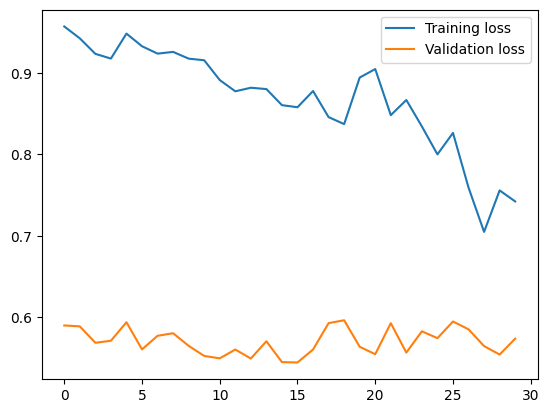

In [ ]:
from keras.models import model_from_json

# specify your learning rate
learning_rate = 0.01
# create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
# compile your model using the custom optimizer
model.compile(optimizer=optimizer, loss='mse')

# Try to load weights
try:
    # 모델 아키텍처 로드
    with open("model.json", "r") as f:
        m_j = f.read()
    loaded_model = model_from_json(m_j)
    model.load_weights('./lstm_weights.h5')
    print("Loaded model weights from disk")
except:
    print("No weights found, training model from scratch")
    # Fit the model
    history = model.fit(trainX, trainY, epochs=30, batch_size=32,
                    validation_split=0.1, verbose=1)
    # Save model weights after training
    m_j = model.to_json()
    with open("model.json", "w") as f:
        f.write(m_j)
    model.save_weights('./lstm_weights.h5')

    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()


17/17 [==============================] - 1s 5ms/step
(534, 1) (534, 1)
(534,)
(534,)


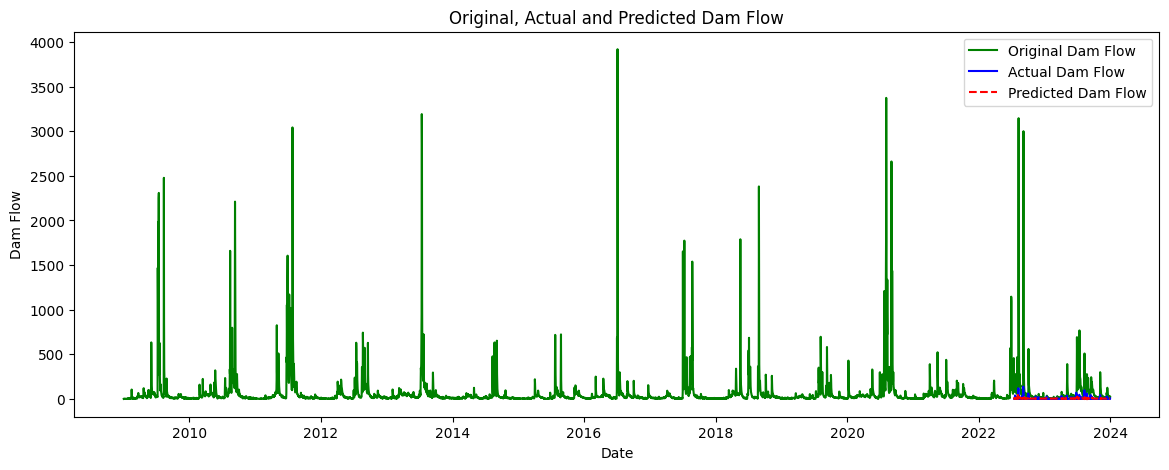

In [ ]:
# prediction
prediction = model.predict(testX)
print(prediction.shape, testY.shape)

# generate array filled with means for prediction
mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)

# substitute predictions into the first column
mean_values_pred[:, 0] = np.squeeze(prediction)

# inverse transform
y_pred = scaler.inverse_transform(mean_values_pred)[:,0]
print(y_pred.shape)

# generate array filled with means for testY
mean_values_testY = np.repeat(scaler.mean_[np.newaxis, :], testY.shape[0], axis=0)

# substitute testY into the first column
mean_values_testY[:, 0] = np.squeeze(testY)

# inverse transform
testY_original = scaler.inverse_transform(mean_values_testY)[:,0]
print(testY_original.shape)

# plotting
plt.figure(figsize=(14, 5))

# plot original 'Open' prices
plt.plot(dates, origin_dam_flow, color='green', label='Original Dam Flow')

# plot actual vs predicted
plt.plot(test_dates[seq_len:], testY_original, color='blue', label='Actual Dam Flow')
plt.plot(test_dates[seq_len:], y_pred, color='red', linestyle='--', label='Predicted Dam Flow')
plt.xlabel('Date')
plt.ylabel('Dam Flow')
plt.title('Original, Actual and Predicted Dam Flow')
plt.legend()
plt.show()

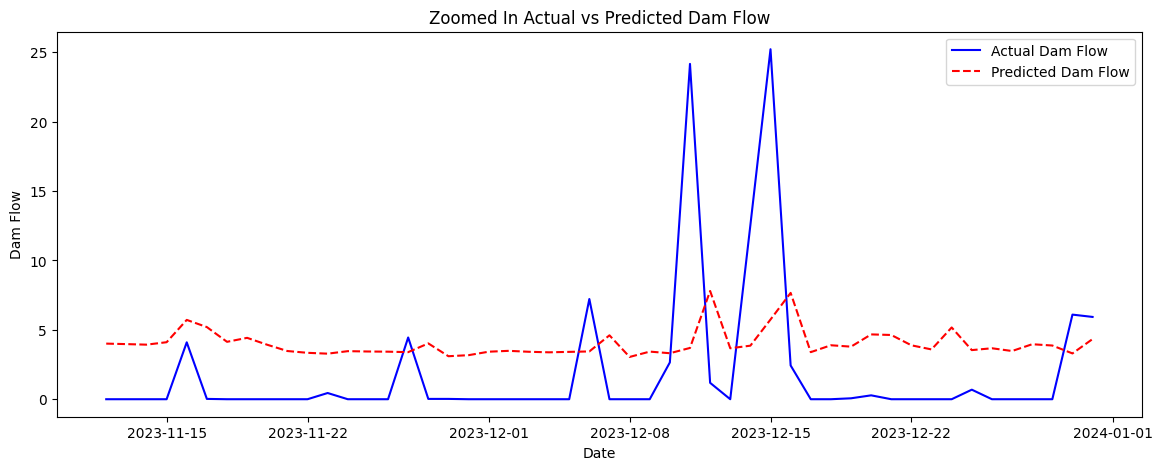

In [ ]:
# Calculate the start and end indices for the zoomed plot
zoom_start = len(test_dates) - 50
zoom_end = len(test_dates)

# Create the zoomed plot
plt.figure(figsize=(14, 5))

# Adjust the start index for the testY_original and y_pred arrays
adjusted_start = zoom_start - seq_len

plt.plot(test_dates[zoom_start:zoom_end],
         testY_original[adjusted_start:zoom_end - zoom_start + adjusted_start],
         color='blue',
         label='Actual Dam Flow')

plt.plot(test_dates[zoom_start:zoom_end],
         y_pred[adjusted_start:zoom_end - zoom_start + adjusted_start ],
         color='red',
         linestyle='--',
         label='Predicted Dam Flow')

plt.xlabel('Date')
plt.ylabel('Dam Flow')
plt.title('Zoomed In Actual vs Predicted Dam Flow')
plt.legend()
plt.show()

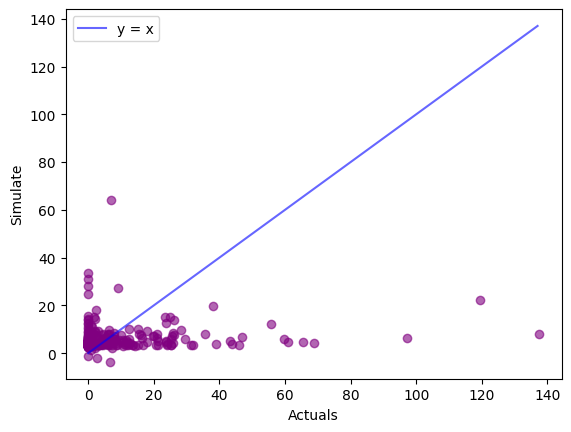

In [ ]:
x = np.arange(0,max(max(testY_original), max(y_pred)))
y = x
plt.scatter(testY_original[:], y_pred[:], color = 'purple', alpha = 0.6)
plt.plot(x,y, color = 'blue', alpha = 0.6, label = 'y = x')
plt.xlabel('Actuals')
plt.ylabel('Simulate')

plt.legend()
plt.show()

In [ ]:
#RMSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(testY_original, y_pred))
print('RMSE : %.2f' %(rmse))

RMSE : 12.64


In [ ]:
# NSE
from numpy import mean
num_sum1 = 0
num_sum2 = 0
num_avg = mean(testY_original[:])
for i in range(len(testY_original)):
  num1 = testY_original[i] - y_pred[i]
  num_sum1 += num1**2
  num2 = testY_original[i] - num_avg
  num_sum2 += num2**2

nse = 1 - (num_sum1 / num_sum2)
print('NSE : %f' %nse)

NSE : 0.018272


In [ ]:
# PBIAS
num_sum1 = 0
for i in range(len(testY_original)):
  num1 = testY_original[i] - y_pred[i]
  num_sum1 += num1

pbias = (num_sum1 / np.sum(testY_original[:])) * 100
print('PBIAS : %f' %pbias)

PBIAS : -15.273487


In [ ]:
#R^2
import math

num_sum1 = 0
num_sum2 = 0
num_sum3 = 0
act_avg = mean(testY_original[:])
pred_avg = mean(y_pred[:])
for i in range(len(testY_original)):
  num1 = (testY_original[i] - act_avg) * (y_pred[i] - pred_avg)
  num_sum1 += num1
  num2 = testY_original[i] - pred_avg
  num_sum2 += num2**2
  num3 = y_pred[i] - pred_avg
  num_sum3 += num3**2

r_square = (num_sum1 / (math.sqrt(num_sum2)* math.sqrt(num_sum3)))**2
print('R Square : %f' %r_square)

R Square : 0.039195
